#Task 1

In [2]:
#Required Libraries

import pylab as pl
import numpy as np
import pandas as pd
import json
import os
import operator
import matplotlib.pylab
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Read data

data = np.load('MTA_Fare.npy')
data.shape
data = np.where(data !=-1, data, np.nan)

In [4]:
#most prominent event

datas = np.nansum(data, axis=1)
print (datas.shape)

(600, 194)


In [5]:
#create data frame

df = np.transpose(datas)
datass = pd.DataFrame(df)

In [6]:
datass.index = pd.Index(pd.date_range(pd.to_datetime('05/21/2010'), pd.to_datetime('02/08/2014'), freq='W'))
print datass.index

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25', 
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=194, freq='W-SUN', tz=None)


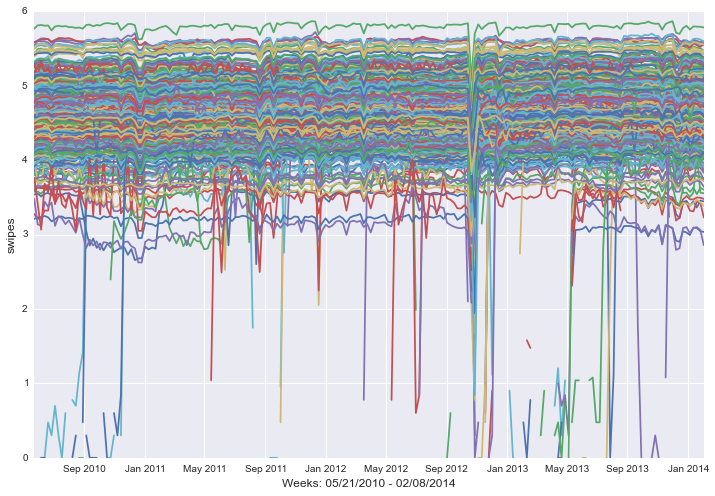

In [7]:
#plot log
log = np.log10(datass)
plt.figure(figsize=(12,8))
pl.plot(datass.index, log)
pl.xlabel("Weeks: 05/21/2010 - 02/08/2014 ", fontsize=12)
pl.ylabel('swipes', fontsize=12)

In [8]:
#creat mean on significant drop
datamean = datass.mean(axis=1)
sdrop = [datamean.mean() + 3*datamean.std(), datamean.mean() - 3*datamean.std()]


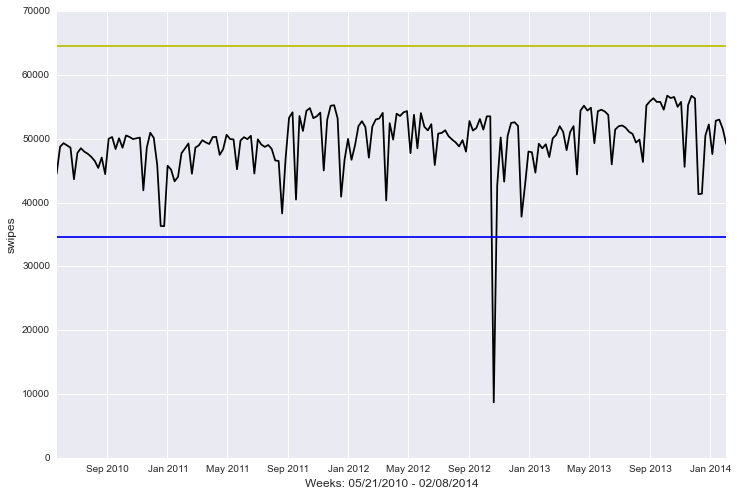

In [9]:
#plot the mean lines to see most remarkable event
plt.figure(figsize=(12,8))
pl.plot(datamean.index, datamean, color='k')
pl.axhline(sdrop[0], color='y', linestyle='-')
pl.axhline(sdrop[1], color='b', linestyle='-')
pl.xlabel("Weeks: 05/21/2010 - 02/08/2014 ", fontsize=12)
pl.ylabel('swipes', fontsize=12)


We see fluctions in the data as a repeated events but between 2012 and 2013, there is a sharp decrease in the activity.

#Task 2

In [10]:
#read depending on the 

datas1 = np.nansum(data, axis=0)
print (datas1.shape)

(23, 194)


In [11]:
#Create data frame and transpose

df1 = np.transpose(datas1)
datas11 = pd.DataFrame(df1)
print (datas11.shape)

(194, 23)


In [12]:
#columns
rides = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [13]:
#read and print columns
datas11.index = pd.Index(pd.date_range(pd.to_datetime('05/21/2010'), pd.to_datetime('02/08/2014'), freq='W'))

datas11.columns = rides
datas11[:10]


,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
2010-05-23,11494615,530524,47801,186551,46808,3697443,8551937,10063,333197,512032,...,123134,790110,59809,28221,0,124693,21060,6128,358,0
2010-05-30,12526859,583533,51486,199229,64353,3981808,9486394,11847,282755,578023,...,151948,908068,69209,32333,0,121713,21670,6120,474,0
2010-06-06,12766627,586194,51636,199668,56994,4033030,9476538,12277,302028,615537,...,151538,914124,69574,32618,0,122181,21433,6490,465,0
2010-06-13,12653675,562602,52063,196389,37429,4032753,9450081,11221,305513,606270,...,147094,902549,68099,32404,0,122051,21630,6590,484,0
2010-06-20,12809694,548858,51153,194883,35210,3925446,9294002,10515,335780,563446,...,137888,855573,66377,31933,176,119776,20297,6313,452,0
2010-06-27,11429783,455691,46852,175648,46849,3663144,8286803,10282,346683,540555,...,111425,730531,54034,27469,1,113699,19800,6158,458,0
2010-07-04,12346877,518187,48963,188467,60225,3918104,9271413,11361,310387,611962,...,140932,838630,65635,32065,2,114803,20816,6793,535,0
2010-07-11,12576759,513412,49629,188090,47439,4028251,9306575,10950,345722,653871,...,138075,845227,65351,32159,3,120293,21497,7182,527,0
2010-07-18,12437115,512192,49030,186822,32084,4030717,9145852,10723,348569,658757,...,136229,832235,64066,31284,0,123578,21620,7116,503,0
2010-07-25,12431257,522569,50376,190528,52171,4032340,8906117,10574,364363,651734,...,134701,823236,63006,31600,4358,125819,21488,7373,506,0


In [14]:
#read and print columns

datas11.index = pd.Index(pd.date_range(pd.to_datetime('05/21/2010'), pd.to_datetime('02/08/2014'), freq='W'))
datas11.columns = rides
datas11[10:]

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
2010-08-01,12401572,518622,48958,188840,54660,4063667,8621043,10826,357417,661279,...,134482,816868,62911,31394,12869,125496,21517,7426,494,0
2010-08-08,12280641,519691,48619,187663,44183,4015534,8468361,10698,356911,626770,...,129490,807297,62922,31340,13877,131761,21581,7342,466,0
2010-08-15,11913505,496049,47465,182039,29340,3957270,8402271,10104,320998,576075,...,121163,789051,61432,31580,10693,130237,21425,7053,376,0
2010-08-22,12391812,513987,50013,185601,37160,3997382,8809816,9769,301366,559962,...,126725,820997,64339,33350,13171,139923,21692,6874,461,0
2010-08-29,11878127,500940,47675,179293,45464,3716943,8176327,10511,338354,528657,...,110570,733636,59663,30824,14242,147412,20573,6766,512,0
2010-09-05,12918455,578854,51176,197971,61920,4116973,9679259,11691,269654,594546,...,150769,903498,75817,38331,13948,144281,21139,6482,531,0
2010-09-12,12812272,590931,51707,200593,45491,4174242,9862782,11190,278144,615216,...,147677,905679,76791,39271,15160,141762,21557,6631,539,0
2010-09-19,12292468,541989,49344,189592,36554,3954011,9649437,9959,261160,568097,...,144746,882332,74704,38952,14099,132716,21373,6374,487,0
2010-09-26,12662413,608230,52702,205199,63071,4064042,10048600,11423,254193,578322,...,150108,905207,76739,40584,16452,117045,17971,5487,473,0
2010-10-03,12400611,575635,49929,197285,59699,3947496,9647368,10943,294784,557977,...,137857,830776,74722,39628,16790,127661,21304,6050,499,0


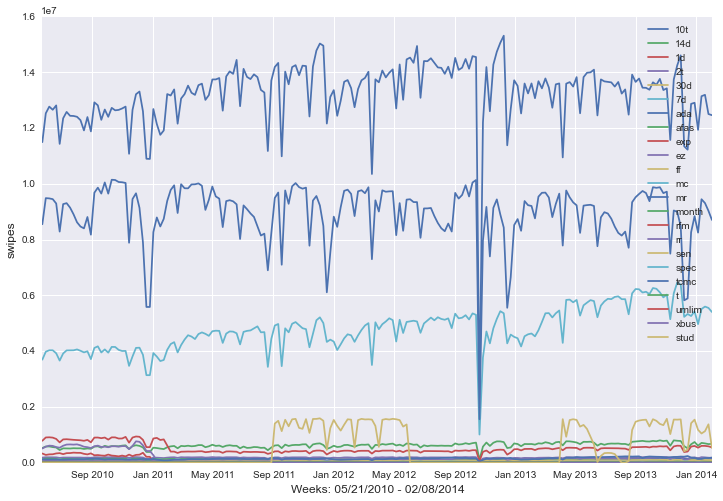

In [15]:
#plot riderships 

plt.figure(figsize=(12,8))
pl.plot(datas11.index, datas11)
pl.xlabel("Weeks: 05/21/2010 - 02/08/2014 ", fontsize=12)
pl.ylabel('swipes', fontsize=12)
pl.legend(datas11.columns)

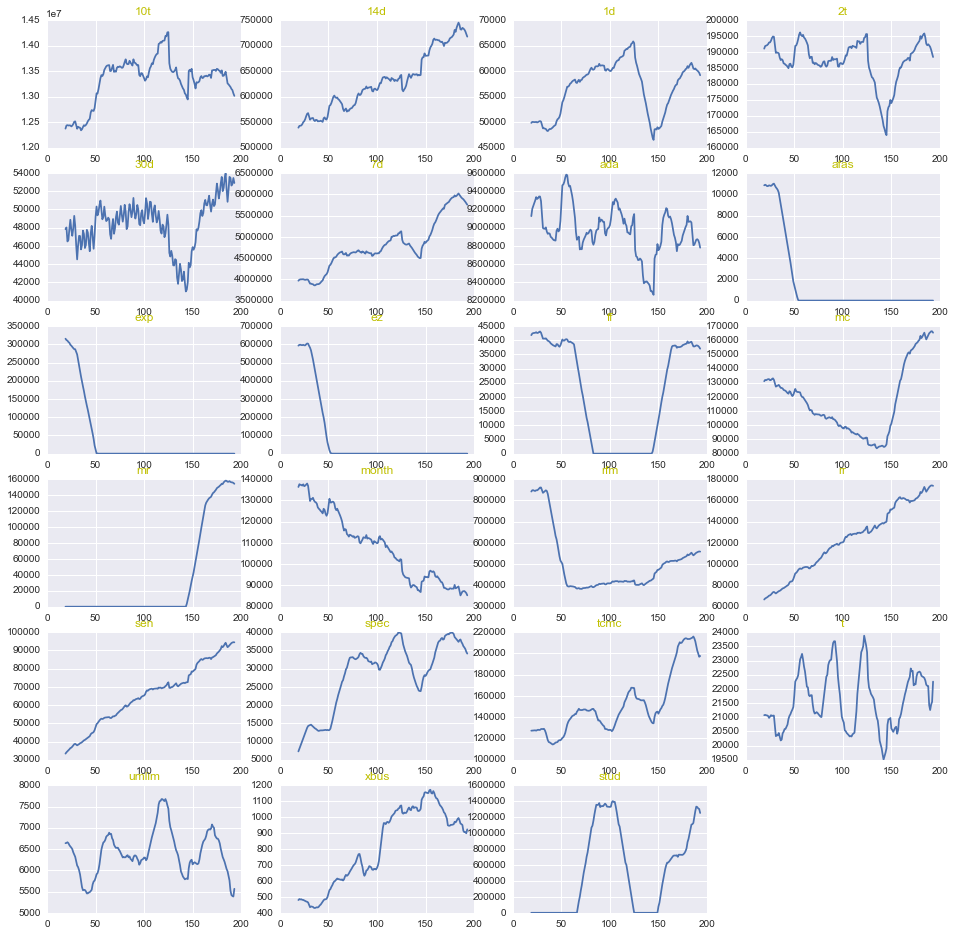

In [16]:
#plot the riders

fig = pl.figure(figsize=(16,16))

x = 0
for i in rides:
    ax = fig.add_subplot(6,4,x+1)
    y = pd.rolling_mean(datas11[i], 20)
    ax.plot(y)
    ax.set_title(i, fontsize=12, color='y')
    x = x+1

Increase: 14, sen, rr
Decrease: aras, exp, ez, month

#Task 3

In [17]:
#Discrete Fourier Transformation
df3 = pd.DataFrame(datas)

f = np.abs(np.fft.rfft(df3[0]))
srate = 1

n = df3[0].size

freq = np.fft.rfftfreq(n, d=1./srate)
fft = np.fft.rfftfreq(n, 1.0)
print df3.shape
print f.shape
print fft.shape


(600, 194)
(301,)
(301,)


KeyError: 194L

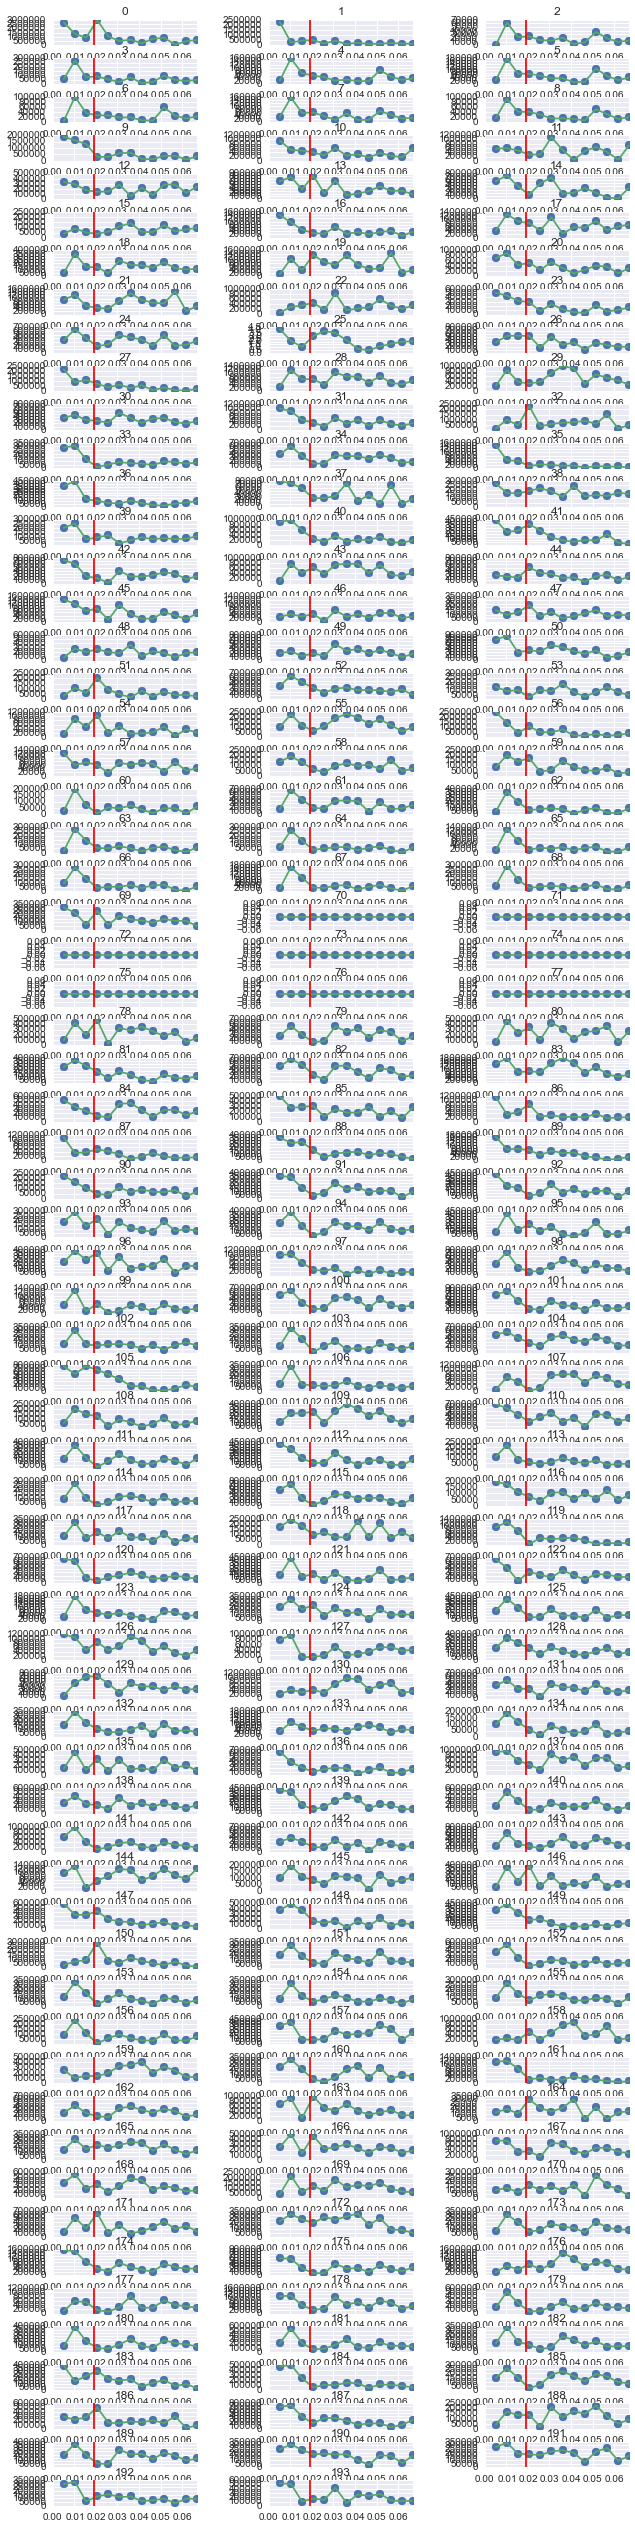

In [18]:
#plot the riders

fig = pl.figure(figsize=(10,200))
a = {}
for i in range(600):
    a[i] = np.abs(np.fft.rfft(df3[i])[4])
    
    ax = fig.add_subplot(300,3,i+1)
    f = np.abs(np.fft.rfft(df3.loc[i,:]))
    
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f[1:]), 'o', ms=8)
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f[1:]), '-')
    ax.set_title(i)
    plt.axvline(1.0/52, color='r')
    ax.set_xlim(0,1.0/15)
    pl.subplots_adjust(wspace=.5, hspace=.5, left=.1, bottom=.1)
    
#recieve error but plots in the bottom side

Most predominant peak: 0,31,146,150,166